# K-Nearest Neighbors Classification

### 3. Teoría

**1. Indique cual es costo de “Training” y de test del algoritmo KNN**

Es costoso porque ocupa gran cantidad de memoria, y además de que es finita, su acceso es caro. Adicionalmente, su ejecución es muy costosa debido a que debe comparar la distancia de cada nueva instancia con otras del set de datos.
En términos de Big O, el costo de entrenamiento es de O(1), ya que se almacenan una sola vez. Por otro lado, el costo de test es de O(N*D), donde N es la cantidad de feature vectors y D es la cantidad de features en cada uno. Si D = N, entonces el costo será de O(N^2).

**2. Explique por qué se dice que instance learning es un algoritmo por fuerza bruta o perezoso.**

Se dice que es un algoritmo perezoso o por fuerza bruta ya que no hay un entrenamiento con lógica, sino que simplemente se compara con el resto de la base de datos a través de la busca de una similitud o de distancia, y se enfoca en encontrar el caso más cercano.

**3. Indique cuántas comparaciones se deben realizar en la etapa de testeo (asumiendo el peor de los casos).**

En la etapa de testeo, en el peor de los casos se debe comparar cada nueva instancia del conjunto de prueba con todas y cada una de las del conjunto de training, por lo que para una se deben hacer N comparaciones, donde N es la cantidad de instancias en el conjunto de training. Para una etapa de testeo con M instancias en el conjunto de prueba, se deben realizar entonces M*N comparaciones.

**4. Investigue alguna modificación que se ha realizado al algoritmo original del KNN.**

inc-k-MSN es una de las modificaciones del algoritmo original del KNN, esta nueva modificación no almacena el conjunto de datos de entrenamiento en la memoria provincial, solamente guarda el objeto a clasificar, así como los k vecinos más similares calculados hasta el paso.


In [3]:
import numpy as np


In [6]:
def euclidian_distance(a, b):
    return np.sqrt(np.sum((a-b)**2, axis=1))

# res = 0
# for j in range(D):
#     res += (a[j] - b[j])**2
# sqrt(res)

In [8]:
def score(X_test, y_test):
    y_pred = predict(X_test)
        
    return float(sum(y_pred == y_test))/ float(len(y_test))

In [9]:
class KNearestNeighbors():
    def __init__(self, X_train, y_train, n_neighbors=5, weights='distance'):

        self.X_train = X_train
        self.y_train = y_train

        self.n_neighbors = n_neighbors
        self.weights = weights

        self.n_classes = 3

    def euclidian_distance(self, a, b):
        return np.sqrt(np.sum((a - b)**2, axis=1))

    def kneighbors(self, X_test, return_distance=False):

        dist = []
        neigh_ind = []

#         print(X_test, self.X_train. X_test, self.X_train)
        point_dist = []
        for x_test in X_test:
            point_dist += [ self.euclidian_distance(x_test, self.X_train) ]

        for row in point_dist:
            enum_neigh = enumerate(row)
            sorted_neigh = sorted(enum_neigh,
                                  key=lambda x: x[1])[:self.n_neighbors]

            ind_list = [tup[0] for tup in sorted_neigh]
            dist_list = [tup[1] for tup in sorted_neigh]

            dist.append(dist_list)
            neigh_ind.append(ind_list)

        if return_distance:
            return np.array(dist), np.array(neigh_ind)

        return np.array(neigh_ind)

    def predict(self, X_test):

        if self.weights == 'uniform':
            neighbors = self.kneighbors(X_test)
            y_pred = np.array([
                np.argmax(np.bincount(self.y_train[neighbor]))
                for neighbor in neighbors
            ])
            #print("Y_pred: ", y_pred)
            return y_pred

        if self.weights == 'distance':

            dist, neigh_ind = self.kneighbors(X_test, return_distance=True)
            inv_dist =1/dist
            mean_in_dist = inv_dist/ np.sum(inv_dist, axis=1)[:, np.newaxis]
            proba=[]
            
            for i, row in enumerate(mean_in_dist):
                row_pred = self.y_train[neigh_ind[i]]
                for k in range(self.n_classes):
                    indices = np.where(row_pred ==k)
                    prob_ind = np.sum(row[indices])
                    proba.append(np.array(prob_ind))
            predict_proba =np.array(proba).reshape(X_test.shape[0],self.n_classes)
            y_pred = np.array([np.argmax(item) for item in predict_proba])

            return y_pred

    def score(self, X_test, y_test):
        y_pred = self.predict(X_test)
        return float(sum(y_pred == y_test)) / float(len(y_test)), y_pred, y_test


# Iris dataset (Observations/Treatments)

In [10]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import time
from matplotlib import pyplot as plt
dataset = datasets.load_iris(as_frame=True)

X = dataset.data
y = dataset.target


In [11]:
X.head(20)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


### 4.1.2

In [12]:
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
    y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(\
                X, y, test_size=0.3, random_state=45)


k_values = [2,3,4,5,6,7,9,11]
our_accuracy_list = []
sklearn_accuracy_list = []
our_time_list = []
sklearn_time_list = []

for k in k_values:
    start_time = time.time()
    our_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=k)
    end_time = time.time()
    time_taken_our_classifier = end_time - start_time
    our_time_list.append(time_taken_our_classifier)
    
    start_time = time.time()
    sklearn_classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
    end_time = time.time()
    time_taken_sklearn_classifier = end_time - start_time
    sklearn_time_list.append(time_taken_sklearn_classifier)

    our_accuracy, y_pred, y_test = our_classifier.score(X_test, y_test)
    sklearn_accuracy = sklearn_classifier.score(X_test, y_test)

    our_accuracy_list.append(our_accuracy)
    sklearn_accuracy_list.append(sklearn_accuracy)

print(y_pred[:20], y_test[:20])


accuracy_data = {
  "Our Implementation": our_accuracy_list,
  "Sklearn\'s Implementation": sklearn_accuracy_list
}
pd.DataFrame(accuracy_data, index = k_values)

[0 0 2 0 0 0 0 2 2 2 0 2 2 2 1 0 2 2 0 1] [0 0 2 0 0 0 0 2 2 2 0 2 2 2 2 0 2 2 0 1]


,Our Implementation,Sklearn's Implementation
2,0.955556,0.955556
3,0.955556,0.955556
4,0.955556,0.955556
5,0.955556,0.955556
6,0.955556,0.955556
7,0.955556,0.955556
9,0.955556,0.955556
11,0.955556,0.955556


In [13]:
time_data = {
  "Our Implementation": our_time_list,
  "Sklearn\'s Implementation": sklearn_time_list
}
pd.DataFrame(time_data, index = k_values)

,Our Implementation,Sklearn's Implementation
2,0.000007,0.001396
3,0.000004,0.000611
4,0.000004,0.000591
5,0.000005,0.000617
6,0.000004,0.000594
7,0.000004,0.000584
9,0.000004,0.000572
11,0.000004,0.000591


### 4.1.3

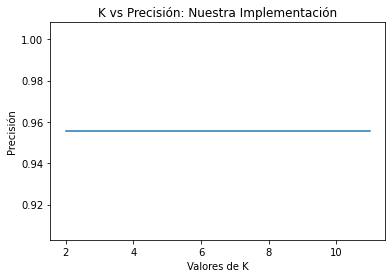

In [14]:
plt.plot(k_values, our_accuracy_list)

plt.title("K vs Precisión: Nuestra Implementación")
plt.xlabel("Valores de K")
plt.ylabel("Precisión")

plt.show()

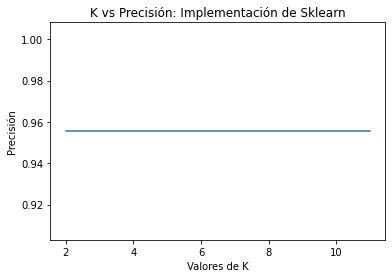

In [15]:
plt.plot(k_values, sklearn_accuracy_list)

plt.title("K vs Precisión: Implementación de Sklearn")
plt.xlabel("Valores de K")
plt.ylabel("Precisión")

plt.show()

#### Discusión

# 4.2. Digits dataset

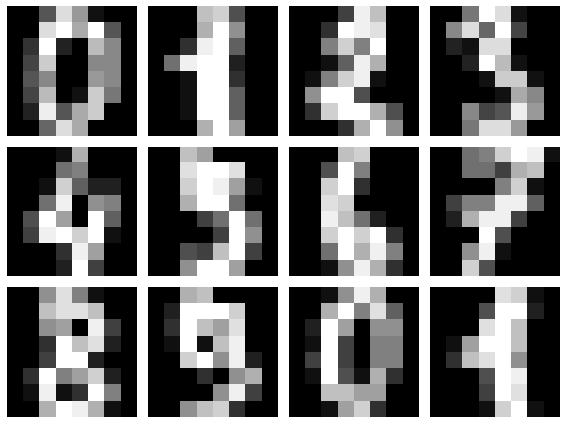

[ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
  3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
 16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
  0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]


In [25]:
from sklearn.datasets import load_digits
import matplotlib.pyplot as plt
digits = load_digits (n_class =10)
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(8, 6))
plt.gray()

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i])
    ax.axis('off')

plt.tight_layout()
plt.show()
print(digits.data[1])
X = digits.data
y = digits.target

In [17]:
print('El set tiene: ', X.shape[0], 'datos')
print('El cada feature vector tiene: ', X.shape[1], 'features')

El set tiene:  1797 datos
El cada feature vector tiene:  64 features


In [18]:
if isinstance(X, pd.DataFrame):
    X = X.to_numpy()
    y = y.to_numpy()

n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, test_size=0.25, random_state=45)

k_values = [2,3,5,7,8,10,11]
our_accuracy_list = []
sklearn_accuracy_list = []

for k in k_values:
    our_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=k)
    sklearn_classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

    our_accuracy, y_pred, y_test = our_classifier.score(X_test, y_test)
    sklearn_accuracy = sklearn_classifier.score(X_test, y_test)

    our_accuracy_list.append(our_accuracy)
    sklearn_accuracy_list.append(sklearn_accuracy)

print(y_pred[:20], y_test[:20])


accuracy_data = {
  "Our Implementation": our_accuracy_list,
  "Sklearn\'s Implementation": sklearn_accuracy_list
}
pd.DataFrame(accuracy_data, index = k_values)

[0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 2 2 0] [0 8 4 4 0 5 1 3 9 9 4 5 0 0 6 4 6 2 2 8]


,Our Implementation,Sklearn's Implementation
2,0.277778,0.982222
3,0.277778,0.982222
5,0.277778,0.977778
7,0.277778,0.968889
8,0.277778,0.968889
10,0.275556,0.964444
11,0.275556,0.966667


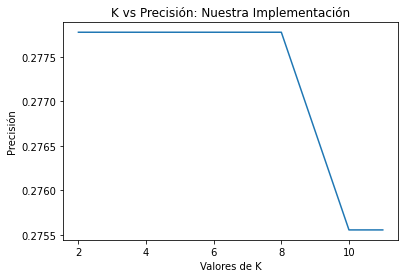

In [19]:
plt.plot(k_values, our_accuracy_list)

plt.title("K vs Precisión: Nuestra Implementación")
plt.xlabel("Valores de K")
plt.ylabel("Precisión")

plt.show()

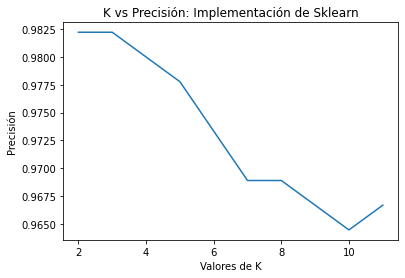

In [20]:
plt.plot(k_values, sklearn_accuracy_list)

plt.title("K vs Precisión: Implementación de Sklearn")
plt.xlabel("Valores de K")
plt.ylabel("Precisión")

plt.show()

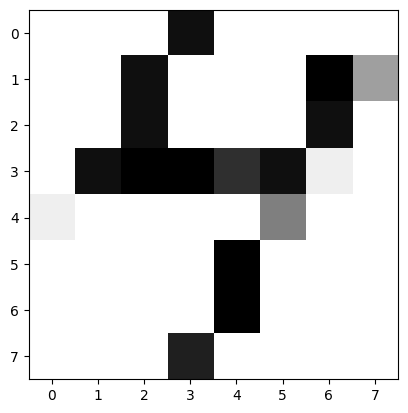

source data in 8x8:
 [[ 0  0  0 15  0  0  0  0]
 [ 0  0 15  0  0  0 16  6]
 [ 0  0 15  0  0  0 15  0]
 [ 0 15 16 16 13 15  1  0]
 [ 1  0  0  0  0  8  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0 14  0  0  0  0]]
[0]


In [49]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = plt.imread('./numeros/4b.png')
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)

our_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=k)
sklearn_classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

predicted = our_classifier.predict(a.flatten().reshape(1, -1))
print(predicted)

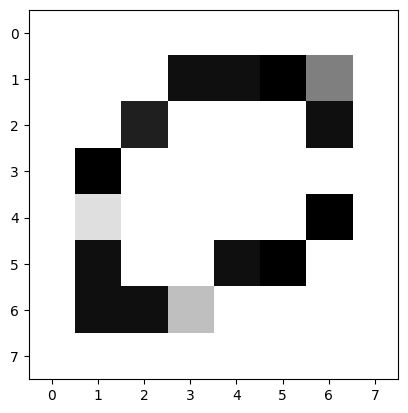

source data in 8x8:
 [[ 0  0  0  0  0  0  0  0]
 [ 0  0  0 15 15 16  8  0]
 [ 0  0 14  0  0  0 15  0]
 [ 0 16  0  0  0  0  0  0]
 [ 0  2  0  0  0  0 16  0]
 [ 0 15  0  0 15 16  0  0]
 [ 0 15 15  4  0  0  0  0]
 [ 0  0  0  0  0  0  0  0]]
[0]


In [50]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = plt.imread('./numeros/0b.png')
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)

our_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=k)
sklearn_classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

predicted = our_classifier.predict(a.flatten().reshape(1, -1))
print(predicted)

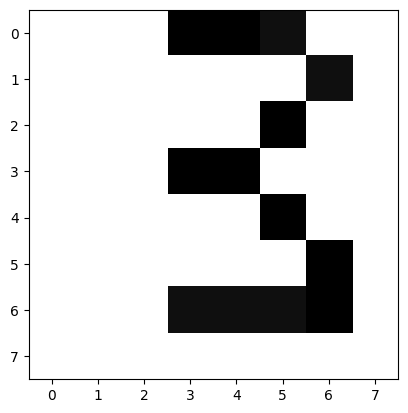

source data in 8x8:
 [[ 0  0  0 16 16 15  0  0]
 [ 0  0  0  0  0  0 15  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0 16 16  0  0  0]
 [ 0  0  0  0  0 16  0  0]
 [ 0  0  0  0  0  0 16  0]
 [ 0  0  0 15 15 15 16  0]
 [ 0  0  0  0  0  0  0  0]]
[0]


In [51]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = plt.imread('./numeros/3b.png')
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)

our_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=k)
sklearn_classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

predicted = our_classifier.predict(a.flatten().reshape(1, -1))
print(predicted)

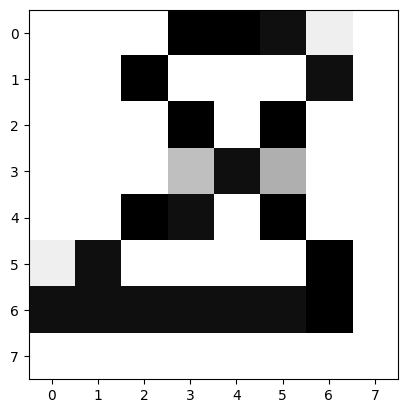

source data in 8x8:
 [[ 0  0  0 16 16 15  1  0]
 [ 0  0 16  0  0  0 15  0]
 [ 0  0  0 16  0 16  0  0]
 [ 0  0  0  4 15  5  0  0]
 [ 0  0 16 15  0 16  0  0]
 [ 1 15  0  0  0  0 16  0]
 [15 15 15 15 15 15 16  0]
 [ 0  0  0  0  0  0  0  0]]
[0]


In [52]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = plt.imread('./numeros/8b.png')
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)

our_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=k)
sklearn_classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

predicted = our_classifier.predict(a.flatten().reshape(1, -1))
print(predicted)

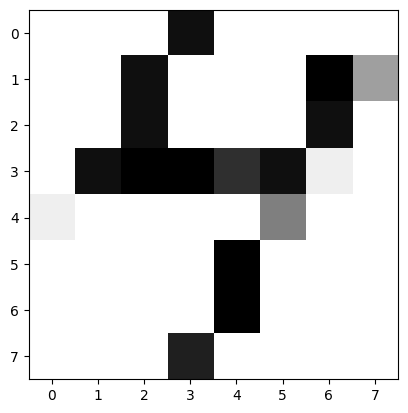

source data in 8x8:
 [[ 0  0  0 15  0  0  0  0]
 [ 0  0 15  0  0  0 16  6]
 [ 0  0 15  0  0  0 15  0]
 [ 0 15 16 16 13 15  1  0]
 [ 1  0  0  0  0  8  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0  0 16  0  0  0]
 [ 0  0  0 14  0  0  0  0]]
[0]


In [53]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img = plt.imread('./numeros/4b.png')
gray = rgb2gray(img)
a=(16-gray*16).astype(int) # really weird here, but try to convert to 0..16
plt.imshow(a, cmap = plt.get_cmap('gray_r'))
plt.show()
print("source data in 8x8:\n",a)

our_classifier = KNearestNeighbors(X_train, y_train, n_neighbors=k)
sklearn_classifier = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)

predicted = our_classifier.predict(a.flatten().reshape(1, -1))
print(predicted)